The goals / steps of this project are the following:

1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
2. Apply a distortion correction to raw images.
3. Use color transforms, gradients, etc., to create a thresholded binary image.
4. Apply a perspective transform to rectify binary image ("birds-eye view").
5. Detect lane pixels and fit to find the lane boundary.
6. Determine the curvature of the lane and vehicle position with respect to center.
7. Warp the detected lane boundaries back onto the original image.
8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

The images for camera calibration are stored in the folder called camera_cal. The images in test_images are for testing the pipeline on single frames. 

The current working directory is C:\Users\Tomek\Desktop\Udacity\CarND-Advanced-Lane-Finding-P4\CarND-Advanced-Lane-Lines

-------------------------------------
Processing image: camera_cal\calibration1.jpg
Original image:


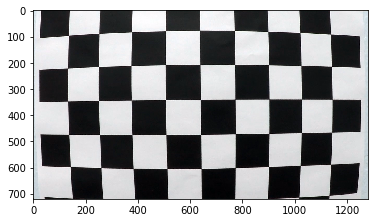

Ret = False

-------------------------------------
Processing image: camera_cal\calibration10.jpg
Original image:


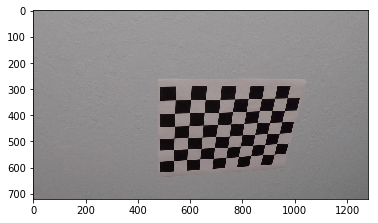

Ret = True
Image with detected corners:


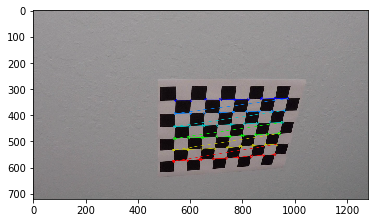


-------------------------------------
Processing image: camera_cal\calibration11.jpg
Original image:


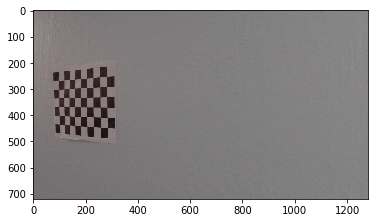

Ret = True
Image with detected corners:


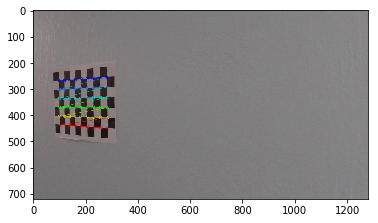


-------------------------------------
Processing image: camera_cal\calibration12.jpg
Original image:


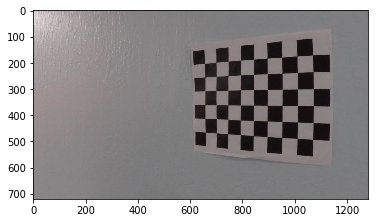

Ret = True
Image with detected corners:


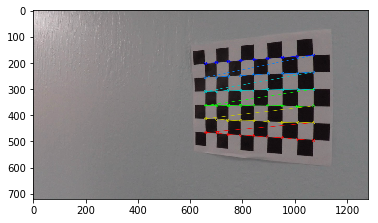


-------------------------------------
Processing image: camera_cal\calibration13.jpg
Original image:


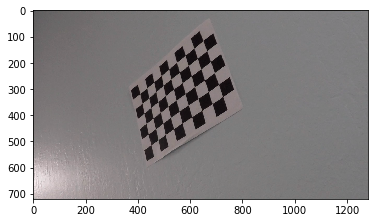

Ret = True
Image with detected corners:


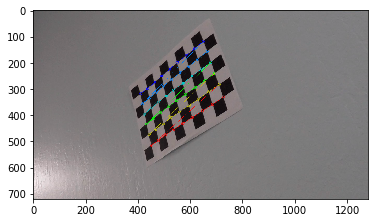


-------------------------------------
Processing image: camera_cal\calibration14.jpg
Original image:


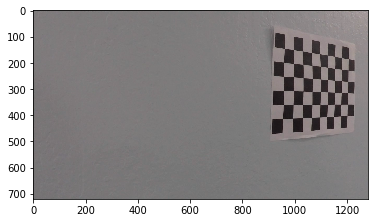

Ret = True
Image with detected corners:


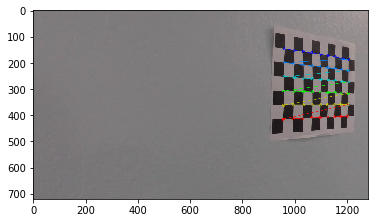


-------------------------------------
Processing image: camera_cal\calibration15.jpg
Original image:


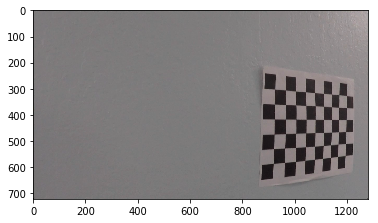

Ret = True
Image with detected corners:


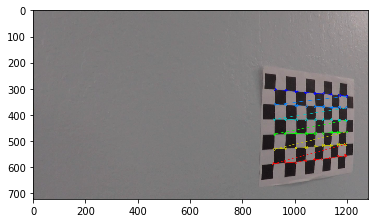


-------------------------------------
Processing image: camera_cal\calibration16.jpg
Original image:


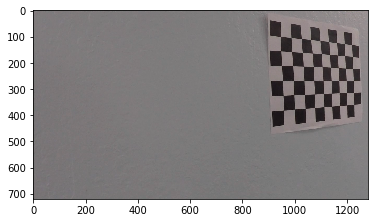

Ret = True
Image with detected corners:


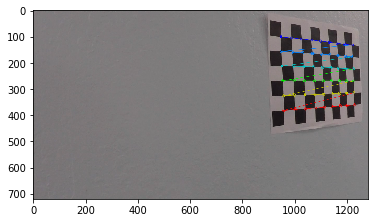


-------------------------------------
Processing image: camera_cal\calibration17.jpg
Original image:


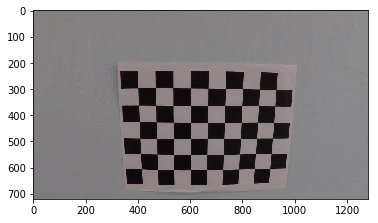

Ret = True
Image with detected corners:


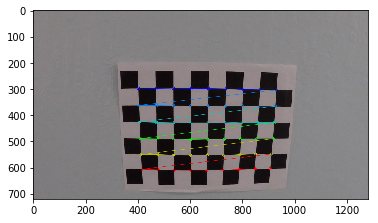


-------------------------------------
Processing image: camera_cal\calibration18.jpg
Original image:


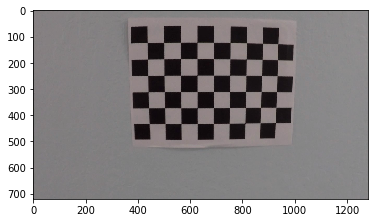

Ret = True
Image with detected corners:


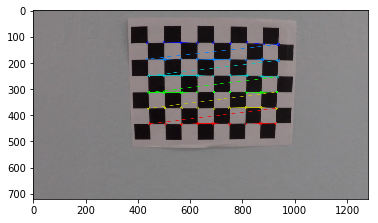


-------------------------------------
Processing image: camera_cal\calibration19.jpg
Original image:


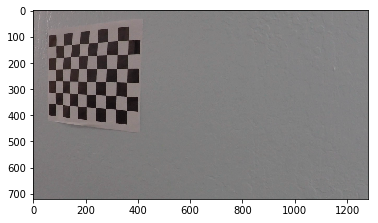

Ret = True
Image with detected corners:


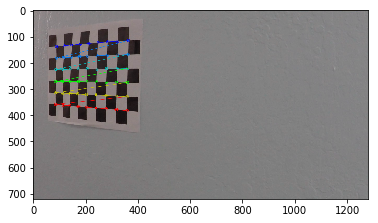


-------------------------------------
Processing image: camera_cal\calibration2.jpg
Original image:


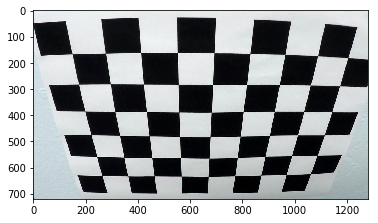

Ret = True
Image with detected corners:


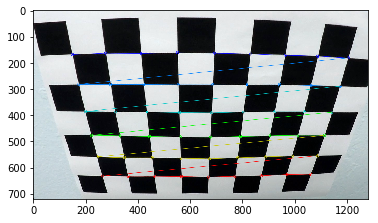


-------------------------------------
Processing image: camera_cal\calibration20.jpg
Original image:


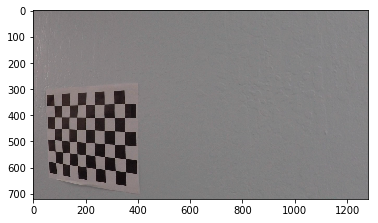

Ret = True
Image with detected corners:


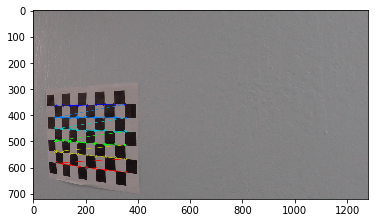


-------------------------------------
Processing image: camera_cal\calibration3.jpg
Original image:


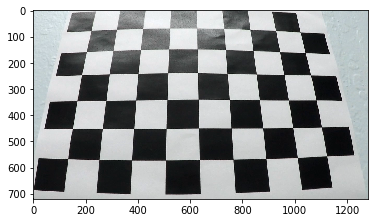

Ret = True
Image with detected corners:


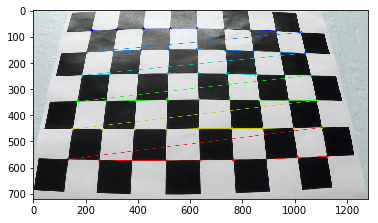


-------------------------------------
Processing image: camera_cal\calibration4.jpg
Original image:


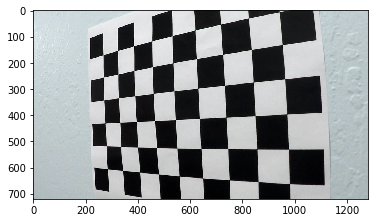

Ret = False

-------------------------------------
Processing image: camera_cal\calibration5.jpg
Original image:


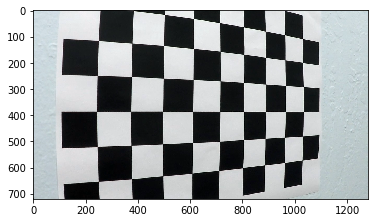

Ret = False

-------------------------------------
Processing image: camera_cal\calibration6.jpg
Original image:


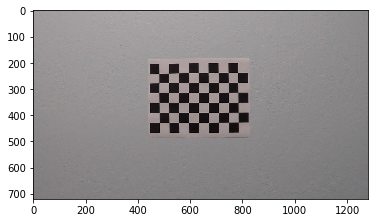

Ret = True
Image with detected corners:


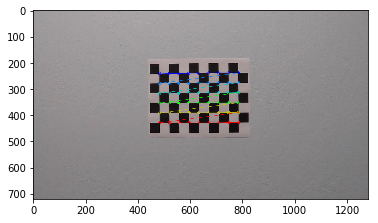


-------------------------------------
Processing image: camera_cal\calibration7.jpg
Original image:


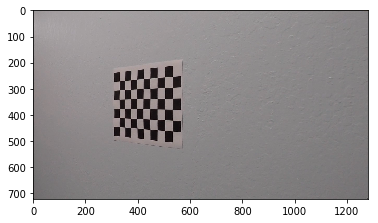

Ret = True
Image with detected corners:


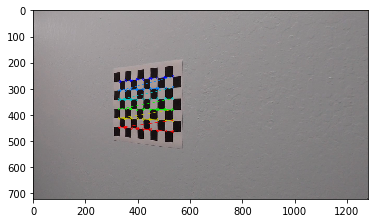


-------------------------------------
Processing image: camera_cal\calibration8.jpg
Original image:


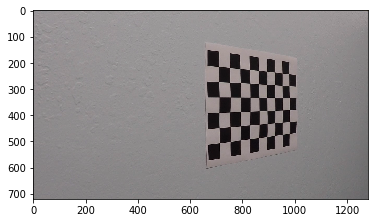

Ret = True
Image with detected corners:


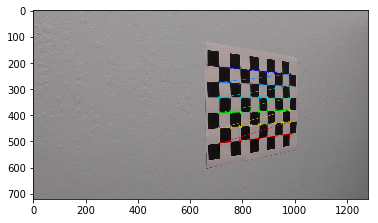


-------------------------------------
Processing image: camera_cal\calibration9.jpg
Original image:


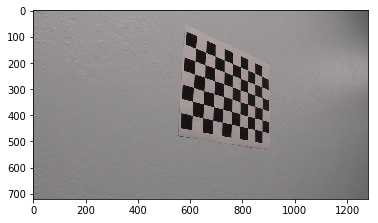

Ret = True
Image with detected corners:


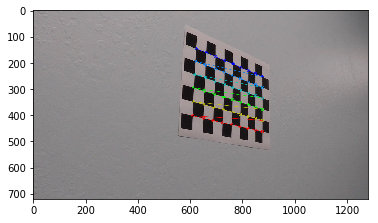

**************
Camera calibration parameters defined!
**************


In [1]:
##### 1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images. #####

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob
%matplotlib inline

print ("The current working directory is", os.getcwd())

# Read in and make a list of calibration images using the glob API
#img = mpimg.imread('camera_cal\calibration1.jpg')
#img = cv2.imread('camera_cal\calibration1.jpg')
#imgplot = plt.imshow(img)
#plt.show()

images = glob.glob('camera_cal\calibration*.jpg')
#print("The following images have been read in:")
#for fname in images:
#    print(fname)

# Arrays to store object points and image points from all the images

objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

objp = np.zeros((6*9, 3), np.float32)

objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # x, y coordinates

for fname in images:
    #Read in an image:
    print()
    print("-------------------------------------")
    print("Processing image:", fname)
    img = cv2.imread(fname)
    print ("Original image:")
    imgplot = plt.imshow(img)
    plt.show()

    # Convert image to grayscale (in case cv2 is used from BGR)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    print("Ret =", ret)

    # If corners are found, add object points, image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
    
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        print("Image with detected corners:")
        imgplot = plt.imshow(img)
        plt.show()

# Camera calibration matrix and distortion coefficients:     
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("**************")
print("Camera calibration parameters defined!")
print("**************")

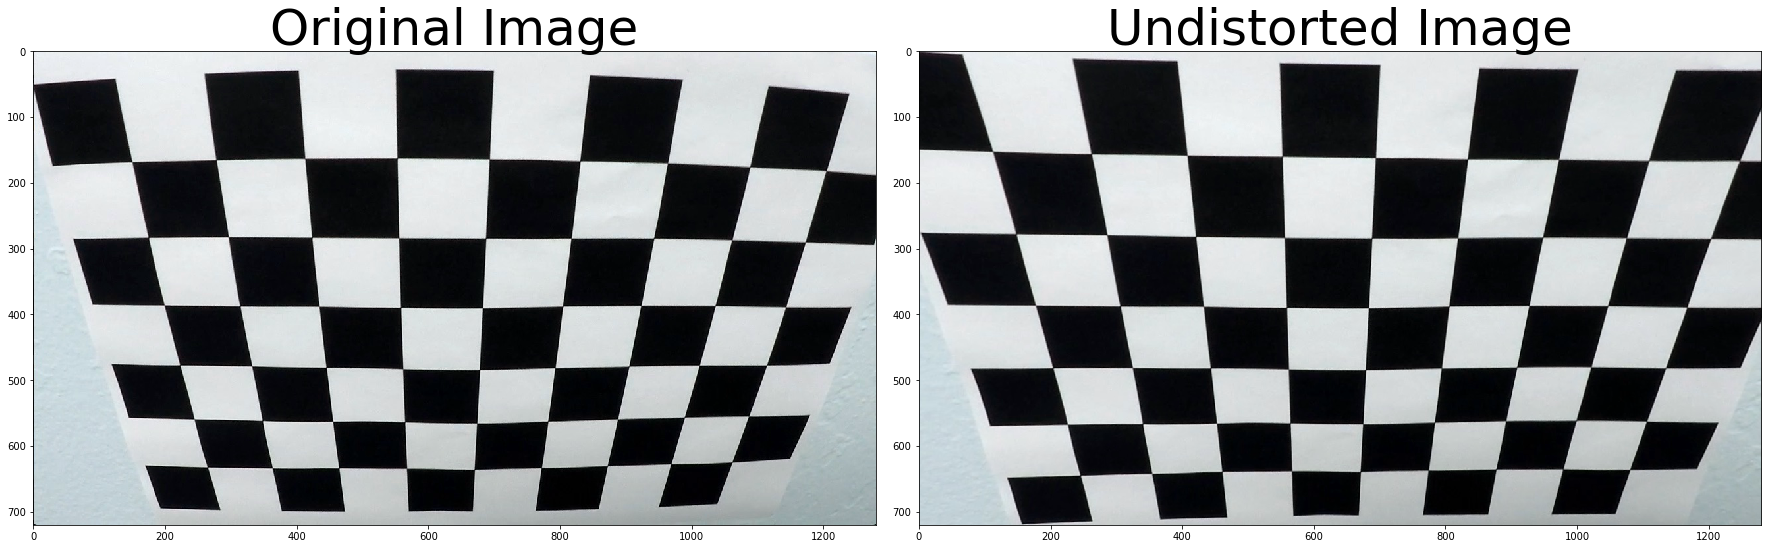

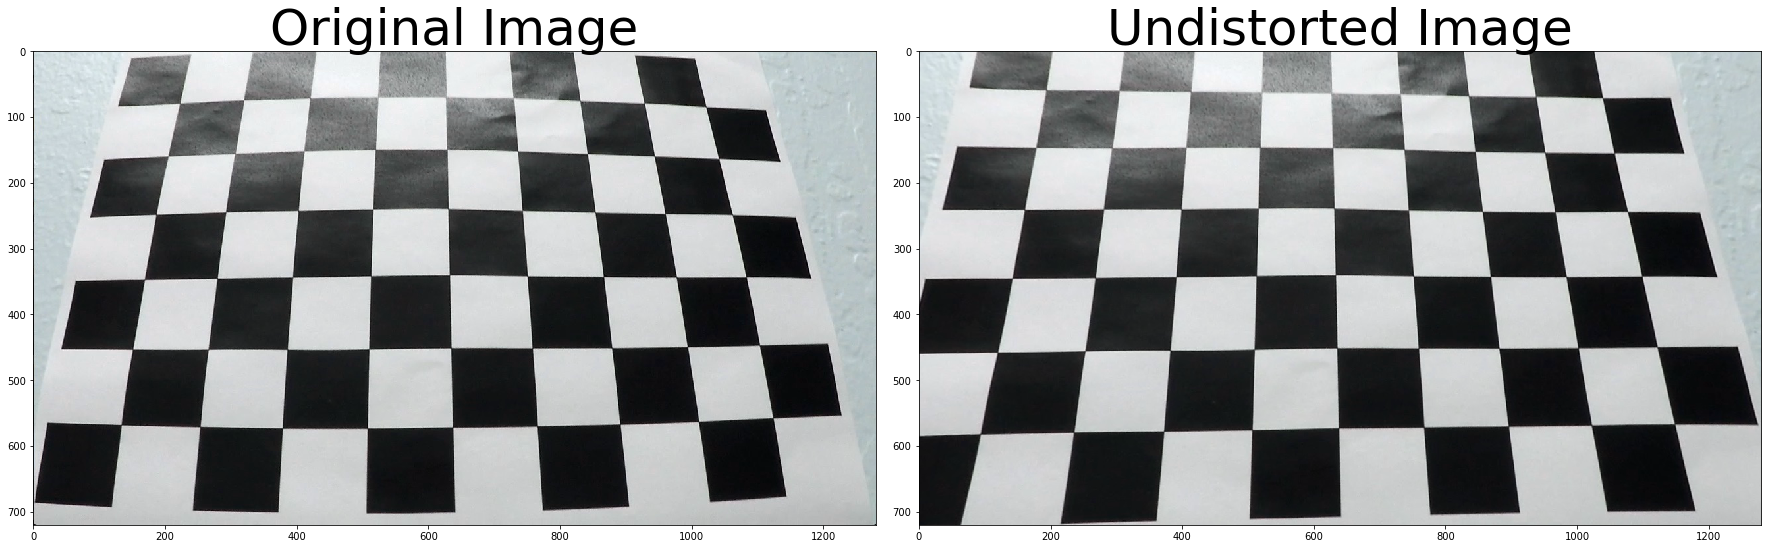

In [2]:
##### 2. Test distortion correction #####

# Defining undistortion function using the camera calibration parameters found earlier
def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

#Testing on 2 images where I can easily see the difference between distorted and undistorted image:
img = cv2.imread('camera_cal\calibration2.jpg')
undistorted = undistort(img)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

img = cv2.imread('camera_cal\calibration3.jpg')
undistorted = undistort(img)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [133]:
##### 3. Use color transforms, gradients, etc., to create a thresholded binary image #####

# Defining absolute sobel transformation
# The function applies Sobel x or y, then takes an absolute value and applies a threshold.

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    if orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output

# Definining a function that applies a threshold to the overall magnitude of the gradient, in both x and y directions. 
# The function applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude
    abs_sobelxy = np.sqrt(np.square(sobelx) + np.square(sobely))
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobelxy = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_sobelxy)
    binary_output[(scaled_sobelxy >= mag_thresh[0]) & (scaled_sobelxy <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output

# Defining a function that applies a threshold to the direction of the gradient (np.arctan2(abs_sobely, abs_sobelx))
# The function applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    gradient_direction = np.arctan2(abs_sobely, abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(gradient_direction)
    binary_output[(gradient_direction >= thresh[0]) & (gradient_direction <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output

# Defining combination of L and S channel filtering:
def color_and_gradient_filter(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the L and S channels
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    #combined_binary = np.zeros_like(sxbinary)
    #combined_binary[(sxbinary >= 1) | (s_binary >= 1)] = 1
    return color_binary
    #return combined_binary

In [134]:
##### 4. Apply a perspective transform to rectify binary image ("birds-eye view") #####

def perspective_transform(img):
    # Define source points - corners of the trapezoid shape..
    src = np.float32([[200, 719], [1108, 719],[535, 490],[750, 490]]) # was 539
    # Define 4 destination points dst = np.float32([[,],[,],[,],[,]])
    dst = np.float32([[370, 720], [929, 720],[370, 490],[929, 490]]) #was 719
    # Use cv2.getPerspectiveTransform() to get M, the transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    # Use cv2.warpPerspective() to warp your image to a top-down view
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR) 
    return warped

In [135]:
##### Function for masking of the warped(!) image #####

def mask_image(img):
    # Create a masked edges image using cv2.fillPoly()
    height,width,depth = img.shape
    mask = np.zeros((height,width), np.uint8)
    ignore_mask_color = 255

    # Define a four sided polygon to mask
    imshape = img.shape
    left_bottom = [300, imshape[0]]
    left_top = [50, 0]
    right_top = [imshape[1]-50, 0]
    right_bottom = [imshape[1]-300,imshape[0]]
    vertices = np.array([[left_bottom, left_top, right_top, right_bottom]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, img, mask = mask)
    return masked_image

In [136]:
##### Lane lines detection #####

def detect_lane_lines(binary_warped, plotting = False):

    #if plotting == True:
    #    print("Warped image again:")
     #   imgplot = plt.imshow(img_warped)
     #   plt.show()
    # Convert image to binary:
    
    # Scale to 8-bit (0 - 255) then convert to type = np.uint8
    #print(np.max(img_warped))
    #scaled_img = np.uint8(255*img_warped/np.max(img_warped))
    # Create a mask of 1's where the scaled gradient magnitude is >= 1
    #binary_output = np.zeros_like(scaled_img)
    #binary_output[(scaled_img >= 0)] = 1
    # Return this mask as your binary_output image
    #binary_warped = binary_output
    
    #img_warped = img_warped.astype(np.uint8) # to make gray conversion work
    #gray_warped = cv2.cvtColor(img_warped, cv2.COLOR_RGB2GRAY)
    #if plotting == True:
    #    print("Grayscaled warped image:")
    #    imgplot = plt.imshow(gray_warped)
    #    plt.show()
    #thresh = 1
    #binary_warped = cv2.threshold(gray_warped, thresh, 255, cv2.THRESH_BINARY)[1] 
    #binary_warped = np.zeros_like(img_warped)
    #binary_warped[(img_warped >= thresh)] = 1
    
    #if plotting == True:
    #    print("Binary warped image:")
     #   imgplot = plt.imshow(binary_warped)
        #plt.show()
        
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
    if plotting == True:
        print("Histogram:")
        imgplot = plt.imshow(histogram)
        plt.show()
    # Create an output image to draw on and  visualize the result
    out_img = binary_warped*255
    # WAS: out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    if plotting == True:
        print("Fitted polynomials:")
        # Generate x and y values for plotting
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
        plt.imshow(out_img)
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, 1280)
        plt.ylim(720, 0)

In [138]:
##### Define the image processing pipeline #####

def processing_pipeline(img):
    ### 1. Apply a distortion correction to raw images.
    undistorted = undistort(img)
    undistorted = cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB) # converting from BGR to RGB for displaying and next steps
    print("Undistorted image:")
    imgplot = plt.imshow(undistorted)
    plt.show()
    
    ### 2. Use color transforms, gradients, etc., to create a thresholded binary image.
    ## OPTION 1: Sobel, magnitude and direction of the gradient combined
    # Choose a Sobel kernel size
    #ksize = 3 # Choose a larger odd number to smooth gradient measurements

    # Apply each of the thresholding functions
    #gradx = abs_sobel_thresh(undistorted, orient='x', sobel_kernel=ksize, thresh=(20, 100))
    #grady = abs_sobel_thresh(undistorted, orient='y', sobel_kernel=ksize, thresh=(20, 100))
    #mag_binary = mag_thresh(undistorted, sobel_kernel=ksize, mag_thresh=(30, 100))
    #dir_binary = dir_threshold(undistorted, sobel_kernel=ksize, thresh=(0.7, 1.3))

    #Try different combinations and see what you get.
    #For example, here is a selection for pixels where both the x and y gradients meet the threshold criteria, 
    #or the gradient magnitude and direction are both within their threshold values.
    #combined = np.zeros_like(dir_binary)
    #combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    
    ## OPTION 2: combined color and gradient thresholds
    combined = color_and_gradient_filter(undistorted)

    # Plot the result
    print("Combined thresholds:")
    imgplot = plt.imshow(combined, cmap='gray') # if grayscale is used - OPTION 1
    #imgplot = plt.imshow(combined) # if RGB (or HLS) image is used - OPTION 2
    plt.show()
    
    # 3. Apply a perspective transform to rectify binary image ("birds-eye view").
    warped = perspective_transform(combined)
    print("Warped image / perspective transform:")
    imgplot = plt.imshow(warped, cmap='gray') # if RGB (or HLS) image is used - OPTION 2
    plt.show()
    
    ### 3b. Apply region of interest masking.
    warped = mask_image(warped)
    print("Masked warped image:")
    imgplot = plt.imshow(warped, cmap='gray')
    plt.show()
    
    # 4. Detect lane pixels and fit to find the lane boundary.
    detect_lane_lines(warped, plotting = True)
    # 5. Determine the curvature of the lane and vehicle position with respect to center.
    # 6. Warp the detected lane boundaries back onto the original image.
    # 7. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.
    

Processing image: test_images\straight_lines1.jpg

Undistorted image:


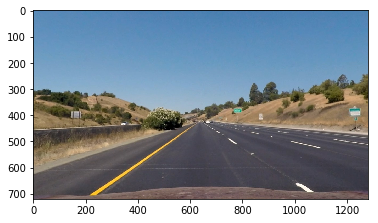

Combined thresholds:


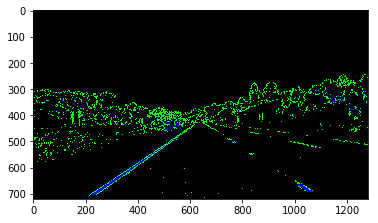

Warped image / perspective transform:


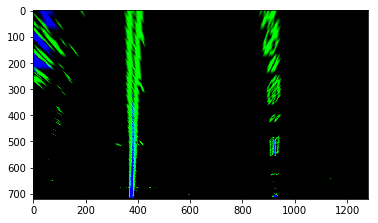

Masked warped image:


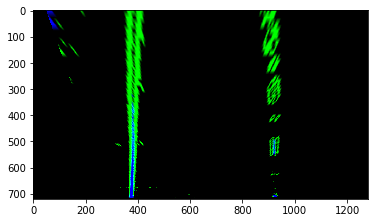

C:\Users\Tomek\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Histogram:


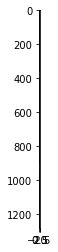

TypeError: expected non-empty vector for x

In [139]:
##### Test the pipeline on single images #####

images = glob.glob('test_images\*.jpg')

for fname in images:
    print("Processing image:", fname)
    print()
    img = cv2.imread(fname)
    processing_pipeline(img)
    print()